In [85]:
import plotly
import plotly.graph_objects as go
import pandas as pd
from analyzer import frame
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [21]:
plot_frame = frame.copy()



In [22]:
plot_frame['Date'] =pd.to_datetime(plot_frame.time)

In [49]:
fig = go.Figure(data=[go.Candlestick(x=plot_frame['time'],
                open=plot_frame['open'],
                high=plot_frame['high'],
                low=plot_frame['low'],
                close=plot_frame['close'])],
                layout = dict(
                title="OHLC",
                xaxis = dict(
                type="category")))

fig.update_layout(xaxis_rangeslider_visible=False)
fig.write_html('first_figure.html', auto_open=True)


In [64]:
top_ret = plot_frame[plot_frame.ret_in_4h > 1.02]

In [65]:
top_ret.shape

(858, 23)

### 

# Reflection strategy

### Df columns

In [14]:
col_lst = plot_frame.columns
past_ret = [i for i in col_lst if '_ret' in i]
forecast_ret = [i for i in col_lst if 'ret_' in i]
col_lst

Index(['time', 'open', 'high', 'low', 'close', 'MA5', 'MA8', 'MA13', 'MA50',
       'MA100', 'STD50', 'STD100', 'Returns', 'ret_in_1h', 'ret_in_2h',
       'ret_in_3h', 'ret_in_4h', '1h_ret', '2h_ret', '3h_ret', '5h_ret',
       '8h_ret', 'Date'],
      dtype='object')

### Scatter past ret and forecast ret

In [15]:
test_str1 = plot_frame[(plot_frame.close > plot_frame.MA100) & (plot_frame.MA100 < plot_frame.MA50)]

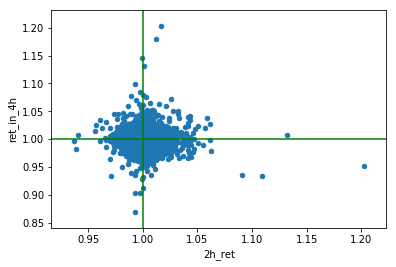

In [16]:
test_str1.plot.scatter(x = '2h_ret', y = 'ret_in_4h')
plt.axvline(x=1, color='g')
plt.axhline(y=1, color='g')

In [17]:
test_str2 = plot_frame[(plot_frame.MA5 > plot_frame.MA8) & (plot_frame.MA8 > plot_frame.MA13)]

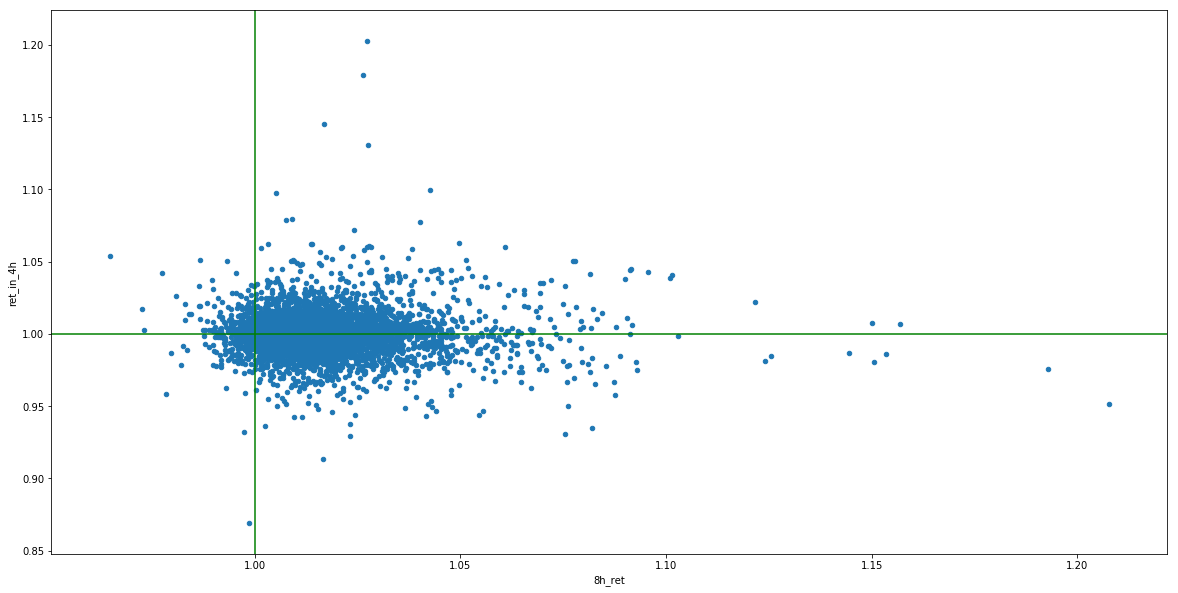

In [36]:
plt.rcParams["figure.figsize"] = [20, 10]
test_str2.plot.scatter(x = '8h_ret', y = 'ret_in_4h')
plt.axvline(x=1, color='g')
plt.axhline(y=1, color='g')

# TraderClass for strategy test and optimization

In [122]:
class Trader:
           
    TRADING_DATA = pd.DataFrame(columns = ['time','ticker',
                                           'buy_price','buy_amount',
                                          'sell_price','sell_amount'])
    
    def __init__(self, risk, return_,):
        self._balance = 0
        self._assets = 0
        self._risk = risk
        self._return = return_
        self._max_duration = 4
        self.flag = True
     
    @property
    def balance(self):
        return self._balance
    
    @balance.setter
    def balance(self,value):
        self._balance += value
        return self._balance
    
#     @property
#     def assets(self):
#         return self._assets
    
#     @assets.setter
#     def assets(self, value):
#         self._assets += value
    
    def buy(self,time,price,amount,ticker):
        if not self.flag:return 'Bot is active'
        
        #Check if enough money to buy asset
        if self.balance - price * amount < 0:return 'Not enough credits'
        
        #Purchase data
        self.balance = -(amount * price)
        data = dict(
            time = time,
            ticker = ticker,
            buy_price = price,
            buy_amount = amount,
            sell_price = np.nan,
            sell_amount = np.nan
        )
        
        self.TRADING_DATA = self.TRADING_DATA.append(data,ignore_index=True)
        self.flag = False
        return self.TRADING_DATA
    
    def sell(self,time,price,amount,ticker):
        
        #Purchase data
        self.balance = (amount * price)
        data = dict(
            time = time,
            ticker = ticker,
            buy_price = np.nan,
            buy_amount = np.nan,
            sell_price = price,
            sell_amount = amount
        )
        
        self.TRADING_DATA = self.TRADING_DATA.append(data,ignore_index=True)
        self.flag = True
        return self.TRADING_DATA
    
trader = Trader(1.01,1.03)
trader.balance = 1000

In [123]:
trader.buy('11-05-2020',100,10,'YNDX')
trader.sell('12-05-2020',100,11,'YNDX')

,time,ticker,buy_price,buy_amount,sell_price,sell_amount
0,11-05-2020,YNDX,100,10,NaN,NaN
1,12-05-2020,YNDX,NaN,NaN,100,11


In [121]:
trader.balance

1100

In [66]:
trader.balance = 100

In [67]:
trader.balance

200